# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

Import the core data science libraries:

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [29]:
df = pd.read_csv('data/ford.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

Showing 5 rows from the data set, selected at random

In [30]:
df.sample(n=5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
15439,S-MAX,2016,17000,Automatic,56372,Diesel,125,52.3,2.0
1830,Focus,2013,6800,Manual,20600,Petrol,145,47.9,1.6
8203,Fiesta,2019,13998,Manual,9832,Petrol,145,58.9,1.0
2932,Ka+,2017,6990,Manual,7394,Petrol,30,57.7,1.2
6046,Focus,2020,18495,Manual,5500,Petrol,145,60.1,1.0


Showing all of the columns and their data types

In [31]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

Shape and features of the data

In [32]:
print(df.shape)
print(df['model'].unique())
print(df['transmission'].unique())
print(df['fuelType'].unique())

(17966, 9)
[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo' 'Focus']
['Automatic' 'Manual' 'Semi-Auto']
['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']


## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

Checking if there is any need for data munging

In [33]:
df.isnull().values.any()

False

Checking for weird values in year

In [34]:
df['year'].unique()

array([2017, 2018, 2019, 2015, 2014, 2016, 2013, 2020, 2012, 2008, 2010,
       2009, 2011, 1998, 2007, 2005, 2006, 2002, 2003, 1996, 2004, 2000,
       2060], dtype=int64)

There are some values with year 2060, which doesn't make sense, so we need to delete those values

In [35]:
df = df[df.year != 2060]

In [36]:
df['year'].unique()

array([2017, 2018, 2019, 2015, 2014, 2016, 2013, 2020, 2012, 2008, 2010,
       2009, 2011, 1998, 2007, 2005, 2006, 2002, 2003, 1996, 2004, 2000],
      dtype=int64)

There are spaces before model names, need to delete that

In [37]:
df['model'] = df['model'].str.strip()
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

Mean of the mileage of cars

In [38]:
df['mileage'].mean()

23360.85844698024

Median of mileage of cars

In [39]:
df['mileage'].median()

18242.0

Oldest cars and newest cars

In [40]:
print(df['year'].min())
print(df['year'].max())

1996
2020


Checking how many cars of different taxing

In [41]:
df['tax'].value_counts()

145    8944
0      2153
150    1944
125    1407
30     1236
20     1210
160     358
200     252
235     123
165     113
205      59
260      41
240      32
265      15
300      11
135      10
140       8
570       6
195       6
325       6
555       4
115       3
155       3
220       3
330       2
305       2
230       2
580       2
190       2
120       2
210       1
185       1
110       1
270       1
290       1
22        1
Name: tax, dtype: int64

Checking which model based on the prediction would be on average the most expensive over all years

In [42]:
df_grouped = df.groupby('model')['price'].mean()
df_grouped

model
B-MAX                     8287.526761
C-MAX                     9914.567219
EcoSport                 12499.268591
Edge                     22810.500000
Escort                    3000.000000
Fiesta                   10196.862569
Focus                    13184.818043
Fusion                    2555.812500
Galaxy                   17841.872807
Grand C-MAX              10881.574899
Grand Tourneo Connect    14874.915254
KA                        5186.125628
Ka+                       8707.856874
Kuga                     15823.472360
Mondeo                   12305.709125
Mustang                  34631.263158
Puma                     21447.250000
Ranger                   14495.000000
S-MAX                    17720.226351
Streetka                  1924.500000
Tourneo Connect          13805.818182
Tourneo Custom           21165.985507
Transit Tourneo          12450.000000
Name: price, dtype: float64

Checking which year is the cheapest

In [43]:
df_sorted = df.sort_values('price')
df_sorted.groupby('year')
df_sorted

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17103,Focus,2003,495,Manual,177644,Petrol,200,41.5,1.6
16811,Mondeo,2005,675,Manual,108000,Petrol,260,36.2,1.8
16904,Focus,2005,675,Manual,121000,Petrol,235,39.8,2.0
14222,Mondeo,2005,675,Manual,97000,Diesel,205,48.7,2.0
16704,Fiesta,2008,694,Manual,82020,Petrol,145,47.1,1.2
...,...,...,...,...,...,...,...,...,...
12613,Mustang,2019,45250,Automatic,2500,Petrol,145,22.1,5.0
17866,Mustang,2020,48000,Manual,50,Petrol,145,23.9,5.0
11910,Mustang,2017,48999,Automatic,7546,Petrol,145,23.5,5.0
11913,Mustang,2017,49999,Manual,21575,Petrol,145,20.9,5.0


General statistical analysis on the whole dataset

In [44]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.864069,12279.856833,23360.858447,113.324353,57.907821,1.350804
std,2.024978,4741.279186,19471.182902,62.010410,10.125350,0.432379
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31048.000000,145.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

Histogram to visualise mileage

Text(0, 0.5, 'count')

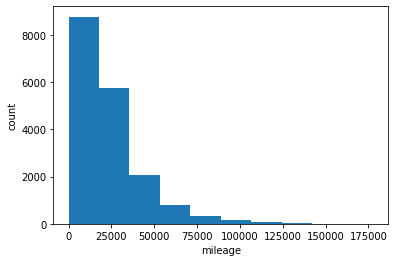

In [45]:
plt.hist(df["mileage"])
plt.xlabel("mileage")
plt.ylabel("count")

Scatterplot between price and model

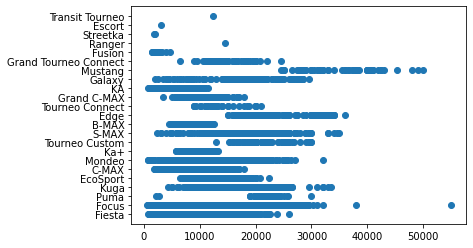

In [46]:
plt.scatter(df['price'], df['model'])
plt.show()

Scatterplot between year and price

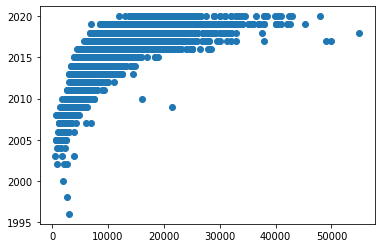

In [47]:
plt.scatter(df['price'], df['year'])
plt.show()

Linechart for number of each model

In [57]:
df['model'].value_counts()

Fiesta                   6556
Focus                    4589
Kuga                     2225
EcoSport                 1143
C-MAX                     543
Ka+                       531
Mondeo                    526
B-MAX                     355
S-MAX                     296
Grand C-MAX               247
Galaxy                    228
Edge                      208
KA                        199
Puma                       80
Tourneo Custom             69
Grand Tourneo Connect      59
Mustang                    57
Tourneo Connect            33
Fusion                     16
Streetka                    2
Ranger                      1
Escort                      1
Transit Tourneo             1
Name: model, dtype: int64

In [58]:
df['model'].unique()

array(['Fiesta', 'Focus', 'Puma', 'Kuga', 'EcoSport', 'C-MAX', 'Mondeo',
       'Ka+', 'Tourneo Custom', 'S-MAX', 'B-MAX', 'Edge',
       'Tourneo Connect', 'Grand C-MAX', 'KA', 'Galaxy', 'Mustang',
       'Grand Tourneo Connect', 'Fusion', 'Ranger', 'Streetka', 'Escort',
       'Transit Tourneo'], dtype=object)

In [59]:
model_count = [6556, 4589, 2225, 1143, 543, 531, 526, 355, 296, 247, 228, 208, 199, 80, 69, 59, 57, 33, 16, 2, 1, 1, 1]
model = ['Fiesta', 'Focus', 'Puma', 'Kuga', 'EcoSport', 'C-MAX', 'Mondeo',
       'Ka+', 'Tourneo Custom', 'S-MAX', 'B-MAX', 'Edge',
       'Tourneo Connect', 'Grand C-MAX', 'KA', 'Galaxy', 'Mustang',
       'Grand Tourneo Connect', 'Fusion', 'Ranger', 'Streetka', 'Escort',
       'Transit Tourneo']

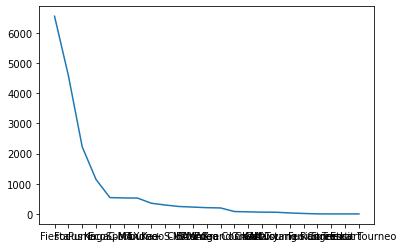

In [60]:
plt.plot(model, model_count)
plt.show()

Histogram to visualise count of different fuel types

Text(0, 0.5, 'count')

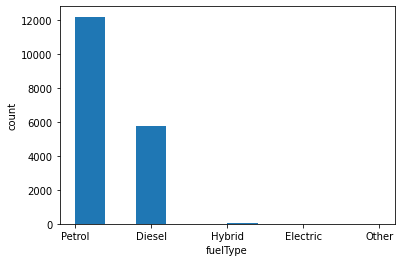

In [61]:
plt.hist(df["fuelType"])
plt.xlabel("fuelType")
plt.ylabel("count")